# import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'seaborn'

   #### loading data

In [88]:
df=pd.read_csv(r"C:\Users\Varun S\Downloads\cleaned_dataset - cleaned_dataset.csv")

TO DISPLAY

In [90]:

df.head()


,Course,Mother's occupation,Father's occupation,Application mode,Mother's qualification,Father's qualification,Admission grade,Previous qualification (grade),Previous qualification,Age at enrollment,Nacionality,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),Target
0,171,5,9,17,19,12,127.3,122.0,1,20,1,0.000000,0.000000,0,0,Dropout
1,9254,3,3,15,1,3,142.5,160.0,1,19,1,13.666667,14.000000,6,6,Graduate
2,9070,9,9,1,37,37,124.8,122.0,1,19,1,0.000000,0.000000,0,0,Dropout
3,9773,5,3,17,38,37,119.6,122.0,1,20,1,12.400000,13.428571,8,10,Graduate
4,8014,9,9,39,37,38,141.5,100.0,1,45,1,13.000000,12.333333,9,6,Graduate


CLEANING DATA

In [91]:
df=df.drop_duplicates()
print(df)

      Course  Mother's occupation  Father's occupation  Application mode  \
0        171                    5                    9                17   
1       9254                    3                    3                15   
2       9070                    9                    9                 1   
3       9773                    5                    3                17   
4       8014                    9                    9                39   
...      ...                  ...                  ...               ...   
4419    9773                    5                    4                 1   
4420    9773                    9                    9                 1   
4421    9500                    9                    9                 1   
4422    9147                    7                    4                 1   
4423    9773                    5                    9                10   

      Mother's qualification  Father's qualification  Admission grade  \
0             

#### checking for null values

In [92]:
df.isnull().sum()
# df['column'].fillna(df['column'].mean(),inplace=True)

Course                                    0
Mother's occupation                       0
Father's occupation                       0
Application mode                          0
Mother's qualification                    0
Father's qualification                    0
Admission grade                           0
Previous qualification (grade)            0
Previous qualification                    0
Age at enrollment                         0
Nacionality                               0
Curricular units 2nd sem (grade)          0
Curricular units 1st sem (grade)          0
Curricular units 1st sem (evaluations)    0
Curricular units 2nd sem (evaluations)    0
Target                                    0
dtype: int64

filling new values

In [93]:
df = df.fillna(23)

SUMMARY OF A DATASET

In [94]:
df=df.describe()
print(df)

            Course  Mother's occupation  Father's occupation  \
count  4424.000000          4424.000000          4424.000000   
mean   8856.642631            10.960895            11.032324   
std    2063.566416            26.418253            25.263040   
min      33.000000             0.000000             0.000000   
25%    9085.000000             4.000000             4.000000   
50%    9238.000000             5.000000             7.000000   
75%    9556.000000             9.000000             9.000000   
max    9991.000000           194.000000           195.000000   

       Application mode  Mother's qualification  Father's qualification  \
count       4424.000000             4424.000000             4424.000000   
mean          18.669078               19.561935               22.275316   
std           17.484682               15.603186               15.343108   
min            1.000000                1.000000                1.000000   
25%            1.000000                2.000000 

#### just for time being taken few features for analaysis

In [95]:
df1=df[["Curricular units 2nd sem (grade)","Curricular units 2nd sem (evaluations)"]]
print(df1)

       Curricular units 2nd sem (grade)  \
count                       4424.000000   
mean                          10.230206   
std                            5.210808   
min                            0.000000   
25%                           10.750000   
50%                           12.200000   
75%                           13.333333   
max                           18.571429   

       Curricular units 2nd sem (evaluations)  
count                             4424.000000  
mean                                 8.063291  
std                                  3.947951  
min                                  0.000000  
25%                                  6.000000  
50%                                  8.000000  
75%                                 10.000000  
max                                 33.000000  


#### Linear Regression

1. target variable should follow normal distribution
2. no multicollinearity
3. homogeneity of variances
4. y=ax+b != x = ay+b

In [96]:
correlation_matrix = df1.corr()
print(correlation_matrix)


                                        Curricular units 2nd sem (grade)  \
Curricular units 2nd sem (grade)                                1.000000   
Curricular units 2nd sem (evaluations)                          0.999992   

                                        Curricular units 2nd sem (evaluations)  
Curricular units 2nd sem (grade)                                      0.999992  
Curricular units 2nd sem (evaluations)                                1.000000  


In [98]:
df2=df[["Curricular units 1st sem (grade)","Curricular units 1st sem (evaluations)"]]
print(df2)

       Curricular units 1st sem (grade)  \
count                       4424.000000   
mean                          10.640822   
std                            4.843663   
min                            0.000000   
25%                           11.000000   
50%                           12.285714   
75%                           13.400000   
max                           18.875000   

       Curricular units 1st sem (evaluations)  
count                             4424.000000  
mean                                 8.299051  
std                                  4.179106  
min                                  0.000000  
25%                                  6.000000  
50%                                  8.000000  
75%                                 10.000000  
max                                 45.000000  


In [99]:
correlation_matrix1 = df2.corr()
print(correlation_matrix1)

                                        Curricular units 1st sem (grade)  \
Curricular units 1st sem (grade)                                1.000000   
Curricular units 1st sem (evaluations)                          0.999979   

                                        Curricular units 1st sem (evaluations)  
Curricular units 1st sem (grade)                                      0.999979  
Curricular units 1st sem (evaluations)                                1.000000  


PLOT FOR DATA

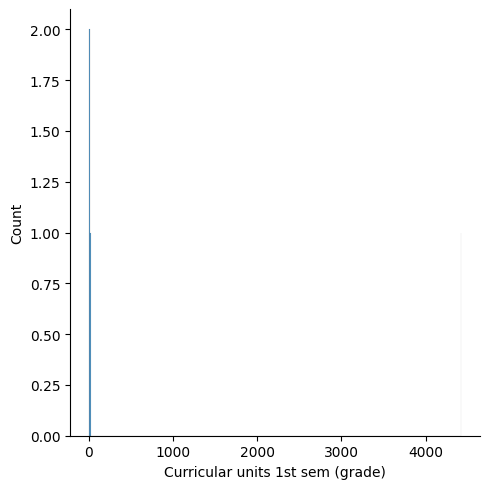

In [100]:
sns.displot(df["Curricular units 1st sem (grade)"])
plt.show()

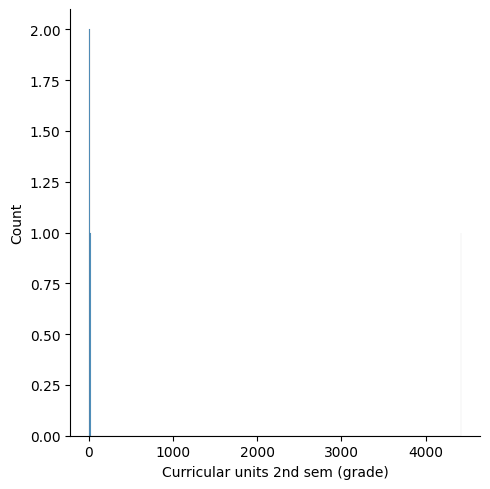

In [101]:
sns.displot(df["Curricular units 2nd sem (grade)"])
plt.show()

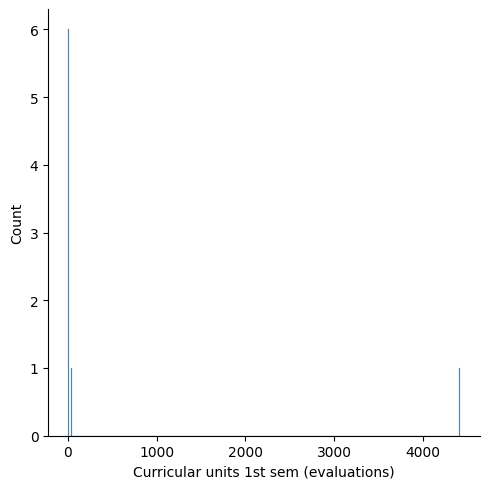

In [102]:
sns.displot(df["Curricular units 1st sem (evaluations)"])


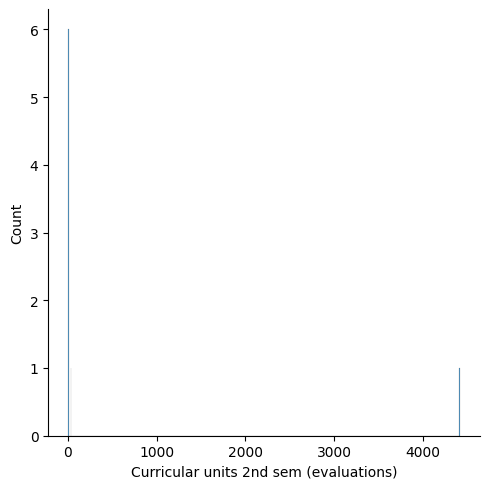

In [103]:
sns.displot(df["Curricular units 2nd sem (evaluations)"])


HEATMAP FOR SPECIFIC DATA

<Axes: >

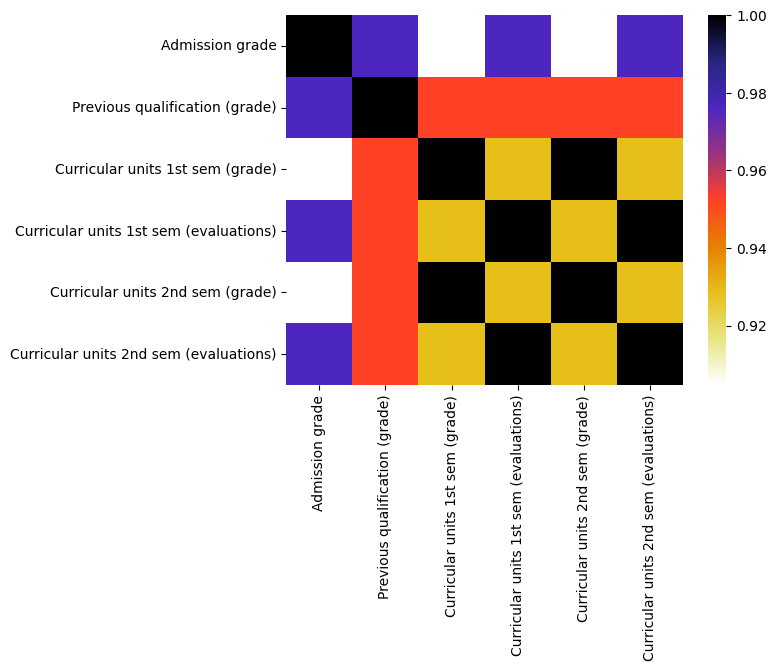

In [113]:
df5=df[["Admission grade","Previous qualification (grade)","Curricular units 1st sem (grade)","Curricular units 1st sem (evaluations)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (evaluations)"]]
sns.heatmap(df5.corr("spearman"),cmap=plt.cm.CMRmap_r)


TRAIN AND TEST DATA SET

In [1]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[["Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)"]],df["Curricular units 2nd sem (grade)"],test_size=0.3)


ModuleNotFoundError: No module named 'sklearn'

In [116]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [117]:
from sklearn.metrics import r2_score
r2_score(y_test,l.predict(x_test))


1.0

MEAN OF DATA SET

In [118]:
grouped_data = df.groupby('Curricular units 1st sem (evaluations)')['Curricular units 2nd sem (evaluations)'].mean()
print(grouped_data)

Curricular units 1st sem (evaluations)
0.000000          0.000000
4.179106          3.947951
6.000000          6.000000
8.000000          8.000000
8.299051          8.063291
10.000000        10.000000
45.000000        33.000000
4424.000000    4424.000000
Name: Curricular units 2nd sem (evaluations), dtype: float64


MEDIAN OF DATA SET

In [119]:
grouped_data = df.groupby('Curricular units 1st sem (evaluations)')['Curricular units 2nd sem (evaluations)'].median()
print(grouped_data)

Curricular units 1st sem (evaluations)
0.000000          0.000000
4.179106          3.947951
6.000000          6.000000
8.000000          8.000000
8.299051          8.063291
10.000000        10.000000
45.000000        33.000000
4424.000000    4424.000000
Name: Curricular units 2nd sem (evaluations), dtype: float64


CONCLUSION:
        THE CORRELATION BETWEEN 1ST SEM, 2ND SEM GRADES AND LINEAR REGRESSION BETWEEN THE GRADES WAS FOUND.
        MEAN AND MEDIAN WAS ALSO FOUND.

FOR VISUALIZATION WE USED BAR PLOTS AND HEATMAPS OF SPEARMANS RANK CORRELATION AND PEARSONS CORRELATION.